In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd output

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [4]:
objid=12
worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)

In [5]:
worker_ids

array([  8,   6,  23,  22,  31,  42,  46,  53,  54, 114, 118, 116, 133,
       142, 131, 140, 149, 146, 147, 150, 148, 137, 228, 143,  52, 179,
       161, 170, 156, 181, 135, 219, 218, 192, 225, 230, 234, 233, 235,
       239,   2, 264, 266, 273])

In [6]:
len(worker_recall_lst)

44

In [7]:
cd ../../

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis


In [9]:
import mpld3
mpld3.enable_notebook()

In [65]:
cd ../../

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis


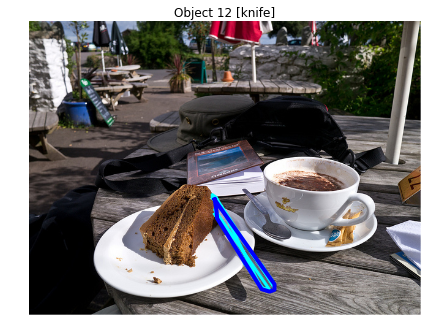

In [10]:
visualize_bb_objects(object_id=12, worker_id=31)

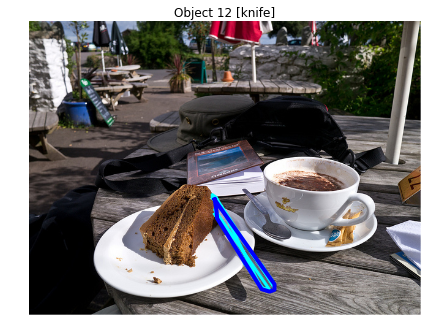

In [8]:
visualize_bb_objects(object_id=12, worker_id=31)

##### precision value exceeds one in the case that the object BB is not closed, to eliminate these cases we enforce precision recall values to lie within [0,1] finding the max. 

In [39]:
objid=12
worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
filter_idx = np.where((worker_recall_lst>=0)&(worker_recall_lst<=1)&(worker_precision_lst>=0)&(worker_precision_lst<=1))[0]

In [40]:
worker_precision_lst=worker_precision_lst[filter_idx]
worker_recall_lst=worker_recall_lst[filter_idx]
worker_ids=worker_ids[filter_idx]

In [41]:
print np.argmax(worker_recall_lst)
print np.argmax(worker_precision_lst)

39
39


In [47]:
best_worker = np.argmax(worker_recall_lst)

In [48]:
best_worker

39

In [45]:
print max(worker_recall_lst),max(worker_precision_lst)

1.0 1.0


In [54]:
os.chdir("../")
tiles,indicatorMat= createObjIndicatorMatrix(objid)
os.chdir(DATA_DIR)

In [44]:
worker_ids[39]

2

In [56]:
shape(indicatorMat)

(45, 54)

In [62]:
approved_tiles = np.where(indicatorMat[:,39]==1)[0]

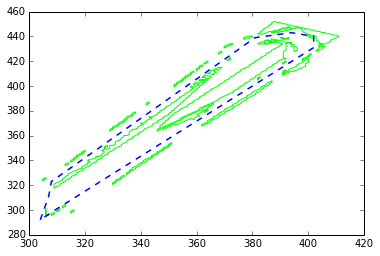

In [83]:
for tidx in approved_tiles:
    plot_coords(Polygon(tiles[tidx]),color="lime")
my_BBG  = pd.read_csv("my_ground_truth.csv")
ground_truth_match = my_BBG[my_BBG.object_id==objid]
x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
plt.plot(x_locs,y_locs,'--',color='#0000ff',linewidth=1.5)

In [88]:
joined_bb = join_tiles(approved_tiles,tiles)

In [89]:
compute_PR(objid,approved_tiles,tiles)

(0.7208712855882602, 0.2792278538412066)

In [81]:
print precision([tiles[tidx][:,0],x_locs],[tiles[tidx][:,1],y_locs])
print recall([tiles[tidx][:,0],x_locs],[tiles[tidx][:,1],y_locs])

0.0
0.0
